In [367]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

df = pd.read_csv('../input/salariesbymajor/salaries_by_college_major.csv')
df.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
0,Accounting,"46,000.00","77,100.00","42,200.00","152,000.00",Business
1,Aerospace Engineering,"57,700.00","101,000.00","64,300.00","161,000.00",STEM
2,Agriculture,"42,600.00","71,900.00","36,300.00","150,000.00",Business
3,Anthropology,"36,800.00","61,500.00","33,800.00","138,000.00",HASS
4,Architecture,"41,600.00","76,800.00","50,600.00","136,000.00",Business


In [368]:
clean_df = df.dropna()
clean_df.tail()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
45,Political Science,"40,800.00","78,200.00","41,200.00","168,000.00",HASS
46,Psychology,"35,900.00","60,400.00","31,600.00","127,000.00",HASS
47,Religion,"34,100.00","52,000.00","29,700.00","96,400.00",HASS
48,Sociology,"36,500.00","58,200.00","30,700.00","118,000.00",HASS
49,Spanish,"34,000.00","53,100.00","31,000.00","96,400.00",HASS


In [369]:
gr_df = clean_df.groupby('Group').count()
gr_df

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary
Group,,,,,
Business,12,12,12,12,12
HASS,22,22,22,22,22
STEM,16,16,16,16,16


Humanities, Arts and Social Sciences (HASS)


Science, Technology, Engineering and Mathematics (STEM)

Text(0, 0.5, 'Majors')

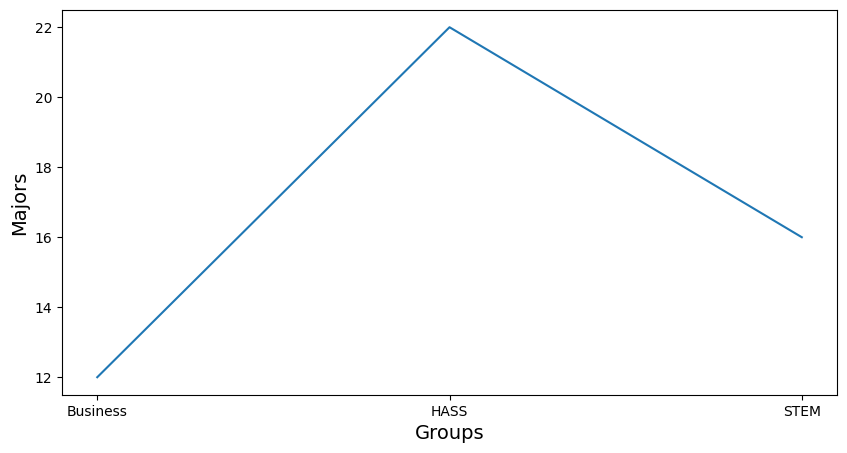

In [370]:
plt.figure(figsize=(10,5)) 
plt.plot(gr_df.index, gr_df['Undergraduate Major'])
plt.xlabel('Groups', fontsize=14)
plt.ylabel('Majors', fontsize=14)

In [371]:
clean_df['Mid-Career Median Salary']

clean_df['Mid-Career Median Salary'].max()

clean_df['Mid-Career Median Salary'].idxmax()

clean_df['Mid-Career Median Salary'].loc[8]

clean_df.loc[8]

Undergraduate Major                  Chemical Engineering
Starting Median Salary                          63,200.00
Mid-Career Median Salary                       107,000.00
Mid-Career 10th Percentile Salary               71,900.00
Mid-Career 90th Percentile Salary              194,000.00
Group                                                STEM
Name: 8, dtype: object

**Major that has the highest mid-career salary:**

In [372]:
print(clean_df['Mid-Career 10th Percentile Salary'].max())
print(f"Index of the max mid career 10th percentile salary: {clean_df['Mid-Career 10th Percentile Salary'].idxmax()}")
clean_df['Undergraduate Major'][8]

71900.0
Index of the max mid career 10th percentile salary: 8


'Chemical Engineering'

**The Lowest Starting and Mid-Career Salary**

In [373]:
print(clean_df['Starting Median Salary'].max())
clean_df['Undergraduate Major'].loc[clean_df['Starting Median Salary'].idxmin()]

clean_df.loc[clean_df['Mid-Career Median Salary'].idxmin()]

74300.0


Undergraduate Major                  Education
Starting Median Salary               34,900.00
Mid-Career Median Salary             52,000.00
Mid-Career 10th Percentile Salary    29,300.00
Mid-Career 90th Percentile Salary   102,000.00
Group                                     HASS
Name: 18, dtype: object

**Lowest Risk Majors**

In [374]:

subtraction = clean_df['Mid-Career 90th Percentile Salary'].subtract(clean_df['Mid-Career 10th Percentile Salary'])
print(subtraction)
spread_col = clean_df['Mid-Career 90th Percentile Salary'] - clean_df['Mid-Career 10th Percentile Salary']
clean_df.insert(1, 'Spread', spread_col)
clean_df.head()

low_risk = clean_df.sort_values('Spread')
low_risk[['Undergraduate Major', 'Spread']].head()

0    109,800.00
1     96,700.00
2    113,700.00
3    104,200.00
4     85,400.00
5     96,200.00
6     98,100.00
7    108,200.00
8    122,100.00
9    102,700.00
10    84,600.00
11   105,500.00
12    95,900.00
13    98,000.00
14   114,700.00
15    74,800.00
16   116,300.00
17   159,400.00
18    72,700.00
19    98,700.00
20    99,600.00
21   102,100.00
22   147,800.00
23    70,000.00
24    92,000.00
25   111,000.00
26    76,000.00
27    66,400.00
28   112,000.00
29    88,500.00
30   115,900.00
31    84,500.00
32    71,300.00
33   118,800.00
34   106,600.00
35   100,700.00
36   132,900.00
37   137,800.00
38    99,300.00
39   107,300.00
40    50,700.00
41    65,300.00
42   132,500.00
43    57,600.00
44   122,000.00
45   126,800.00
46    95,400.00
47    66,700.00
48    87,300.00
49    65,400.00
dtype: float64


,Undergraduate Major,Spread
40,Nursing,"50,700.00"
43,Physician Assistant,"57,600.00"
41,Nutrition,"65,300.00"
49,Spanish,"65,400.00"
27,Health Care Administration,"66,400.00"


**Degrees with the highest potential in the 90th percentile:**

In [375]:
highest_potential = clean_df.sort_values('Mid-Career 90th Percentile Salary', ascending=False)
df_of_highest_potential= highest_potential[['Undergraduate Major', 'Mid-Career 90th Percentile Salary']].head()
df_of_highest_potential

,Undergraduate Major,Mid-Career 90th Percentile Salary
17,Economics,"210,000.00"
22,Finance,"195,000.00"
8,Chemical Engineering,"194,000.00"
37,Math,"183,000.00"
44,Physics,"178,000.00"


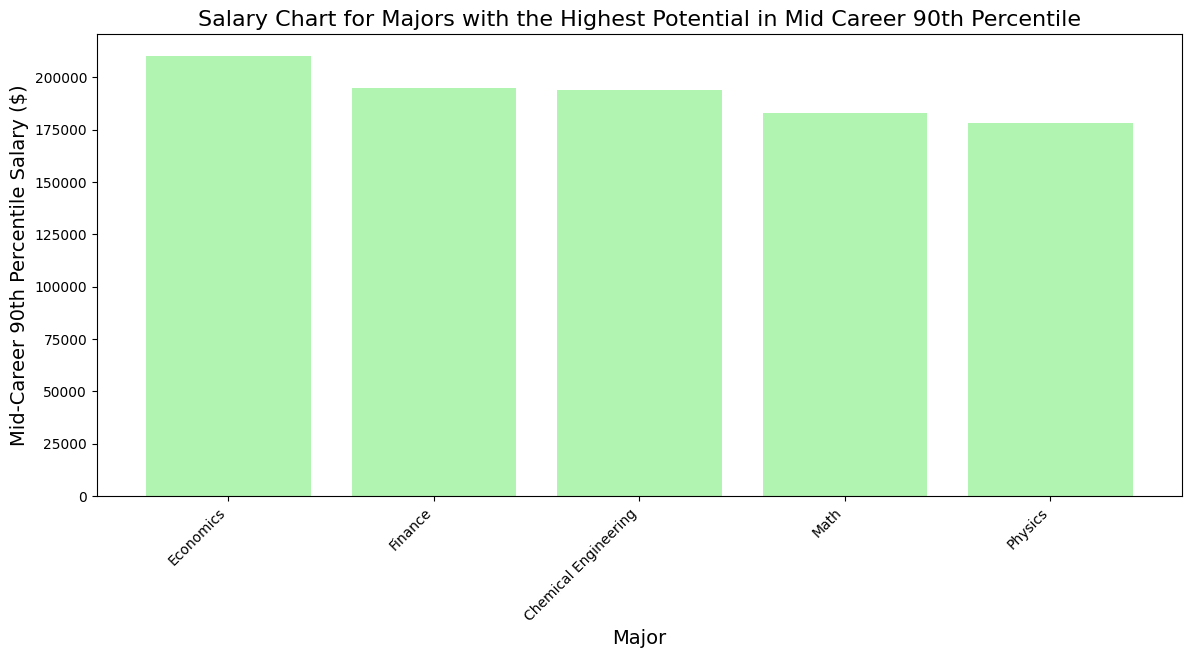

In [376]:
salary_columns = ['Mid-Career 90th Percentile Salary']


for column in salary_columns:
    df_of_highest_potential[column] = df_of_highest_potential[column].replace('[\$,]', '', regex=True).astype(float)


plt.figure(figsize=(14, 6))
for major_name in df_of_highest_potential['Undergraduate Major']:
    major_data = df_of_highest_potential[df_of_highest_potential['Undergraduate Major'] == major_name]

    plt.bar(major_name, major_data[salary_columns].values.flatten(), color = ['lightgreen'], alpha=0.7)

plt.xlabel('Major', fontsize=14)
plt.ylabel('Mid-Career 90th Percentile Salary ($)', fontsize=14)
plt.title('Salary Chart for Majors with the Highest Potential in Mid Career 90th Percentile', fontsize=16)
plt.xticks(rotation=45, ha='right')  
plt.show()

**Majors with the Greatest Spread in Salaries**


In [377]:

highest_spread = clean_df.sort_values('Spread', ascending=False)
df_of_highest_spread = highest_spread[['Undergraduate Major', 'Spread']].head()
df_of_highest_spread

,Undergraduate Major,Spread
17,Economics,"159,400.00"
22,Finance,"147,800.00"
37,Math,"137,800.00"
36,Marketing,"132,900.00"
42,Philosophy,"132,500.00"


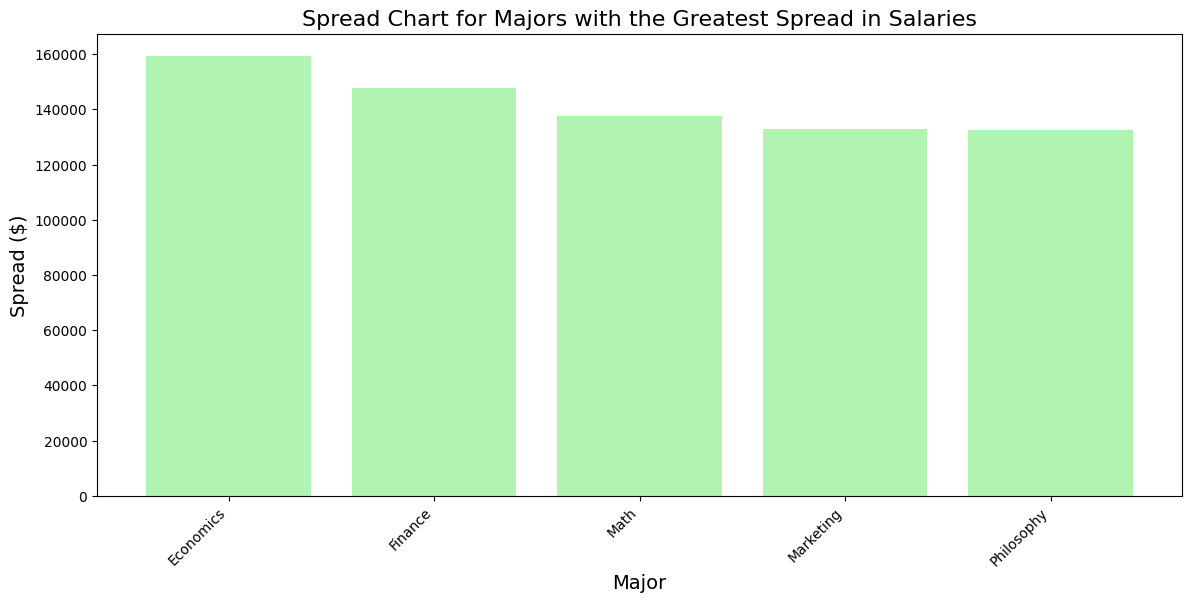

In [378]:
salary_columns = ['Undergraduate Major', 'Spread']


df_of_highest_spread['Spread'] = df_of_highest_spread['Spread'].replace('[\$,]', '', regex=True).astype(float)

plt.figure(figsize=(14, 6))
plt.bar(df_of_highest_spread['Undergraduate Major'], df_of_highest_spread['Spread'],color = 'lightgreen', alpha=0.7)

plt.xlabel('Major', fontsize=14)
plt.ylabel('Spread ($)', fontsize=14)
plt.title('Spread Chart for Majors with the Greatest Spread in Salaries', fontsize=16)
plt.xticks(rotation=45, ha='right')  
plt.show()